# Introduction

In this notebook I will try to give you an intuition what image filters do.

# Check dependencies

In the following some libraries are needed:

In [1]:
import cv2
print(cv2.__version__)

import matplotlib
print(matplotlib.__version__)

import numpy as np
print(np.__version__)

4.2.0
3.1.3
1.18.1


# Load test image and convert it to grayscale

In [2]:
fname = "../pics/on_the_highway_a7.png"
img = cv2.imread(fname)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(836, 1493)

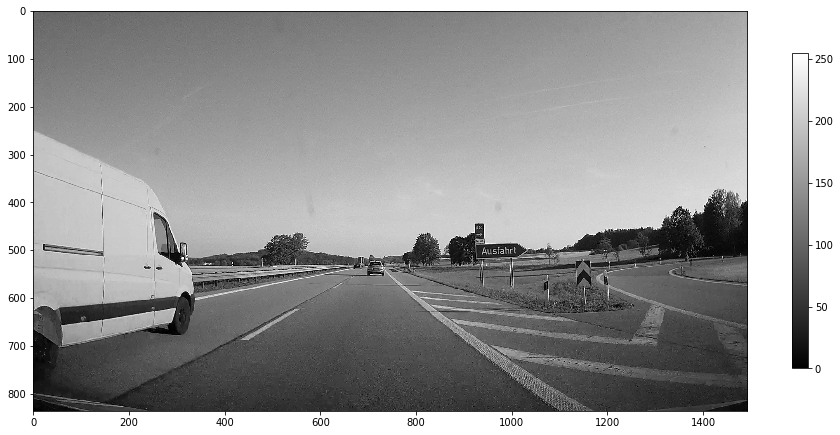

In [3]:
import matplotlib.pyplot as plt

pixel_size_in_inch = 0.02
fig_height_inch = int(img_gray.shape[0] * pixel_size_in_inch)
fig_width_inch  = int(img_gray.shape[1] * pixel_size_in_inch)

plt.figure(figsize=(fig_height_inch,fig_width_inch))

plt.imshow(img_gray, cmap="gray")
plt.colorbar(shrink=0.2)

# Define a filter kernel

In [4]:
import numpy as np
F = np.array( [[1,1,1],
               [0,0,0],
               [-1,-1,-1]] )

In [5]:
type(F)

numpy.ndarray

In [6]:
F.shape

(3, 3)

In [7]:
F.ndim

2

# Define an own convolution function

In [8]:
def my_conv(I,F):
    """
    Filter image I with filter F
    and return the filter response matrix R
    
    Note: we assume, that filter F has a quadratic shape
    """
    
    # 1. Create an "empty" filter response matrix R
    I_height = I.shape[0]
    I_width  = I.shape[1]
    F_size = F.shape[0]
    R_height = I_height - F_size + 1
    R_width  = I_width  - F_size + 1
    R = np.zeros((R_height, R_width))
    
    # 2. check shapes of matrices
    print("image has shape: {0}".format(I.shape))
    print("filter has shape: {0}".format(F.shape))
    print("response matrix has shape: {0}".format(R.shape))
    
    # 3. now compute all response values,
    #    i.e. fill values of R
    #multiplication_counter = 0
    for y in range(0,R_height):
        for x in range(0,R_width):
            
            # compute a single filter response value
            value = 0.0
            for dy in range(0,F_size):
                for dx in range(0,F_size):
                    value += I[y+dy][x+dx] * F[dy][dx]  # MULTIPLY-AND-ACCUMULATE (MAC)
                    #multiplication_counter += 1
                    
            # store filter response value in response matrix R
            R[y][x] = value
            
    # 4. return the filter response matrix
    #print("nr of multiplications: {0}".format(multiplication_counter))
    return R

# Filter the gray-scale image using the own convolution function

In [9]:
R = my_conv(img_gray, F)

image has shape: (836, 1493)
filter has shape: (3, 3)
response matrix has shape: (834, 1491)


In [10]:
R.max()

711.0

In [11]:
3*255

765

In [12]:
R.min()

-717.0

In [13]:
3*255

765

# Computing the number of multiplications needed

In [14]:
R.size

1243494

In [15]:
R.shape
#(836, 1493) Shape of input tensor

(834, 1491)

In [16]:
F.shape[0]**2

9

In [17]:
R.size * F.shape[0]**2

11191446

# Visualize filter response matrix

In [18]:
R.shape

(834, 1491)

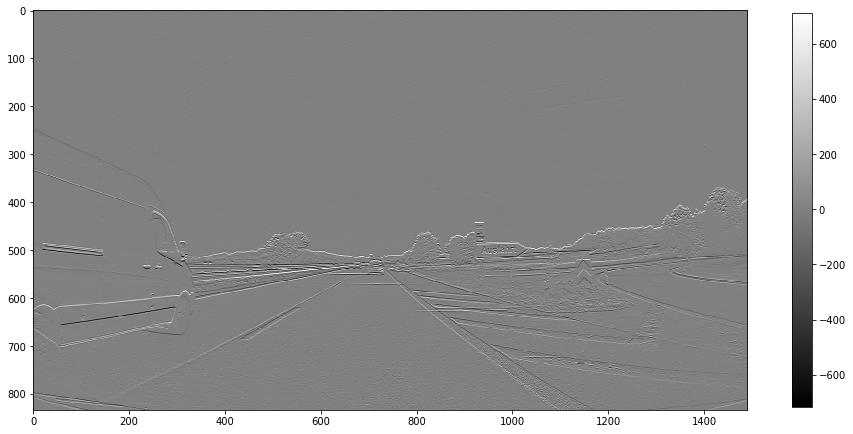

In [19]:
pixel_size_in_inch = 0.02
fig_height_inch = int(R.shape[0] * pixel_size_in_inch)
fig_width_inch  = int(R.shape[1] * pixel_size_in_inch)

plt.figure(figsize=(fig_height_inch,fig_width_inch))

plt.imshow(R, cmap="gray")
plt.colorbar(shrink=.25)

List of `imshow()` colormaps: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

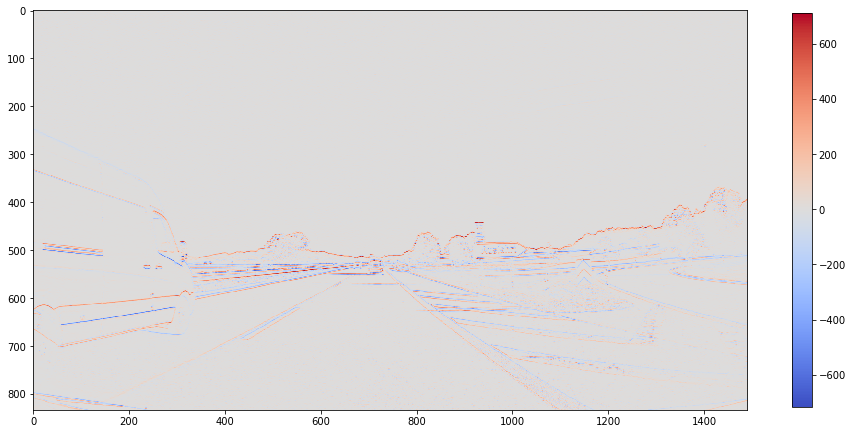

In [20]:
pixel_size_in_inch = 0.02
fig_height_inch = int(R.shape[0] * pixel_size_in_inch)
fig_width_inch  = int(R.shape[1] * pixel_size_in_inch)

plt.figure(figsize=(fig_height_inch,fig_width_inch))

plt.imshow(R, cmap="coolwarm")
plt.colorbar(shrink=.25)

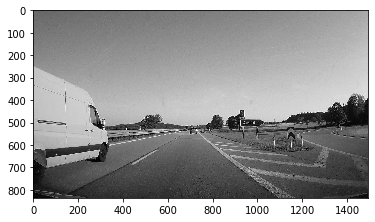

In [21]:
plt.imshow(img_gray, cmap="gray")

# Display only magnitude of the filter response values

In [22]:
R_mag = abs(R) / (3*255.0)

In [23]:
R_mag.shape

(834, 1491)

In [24]:
R_mag.min()

0.0

In [25]:
R_mag.max()

0.9372549019607843

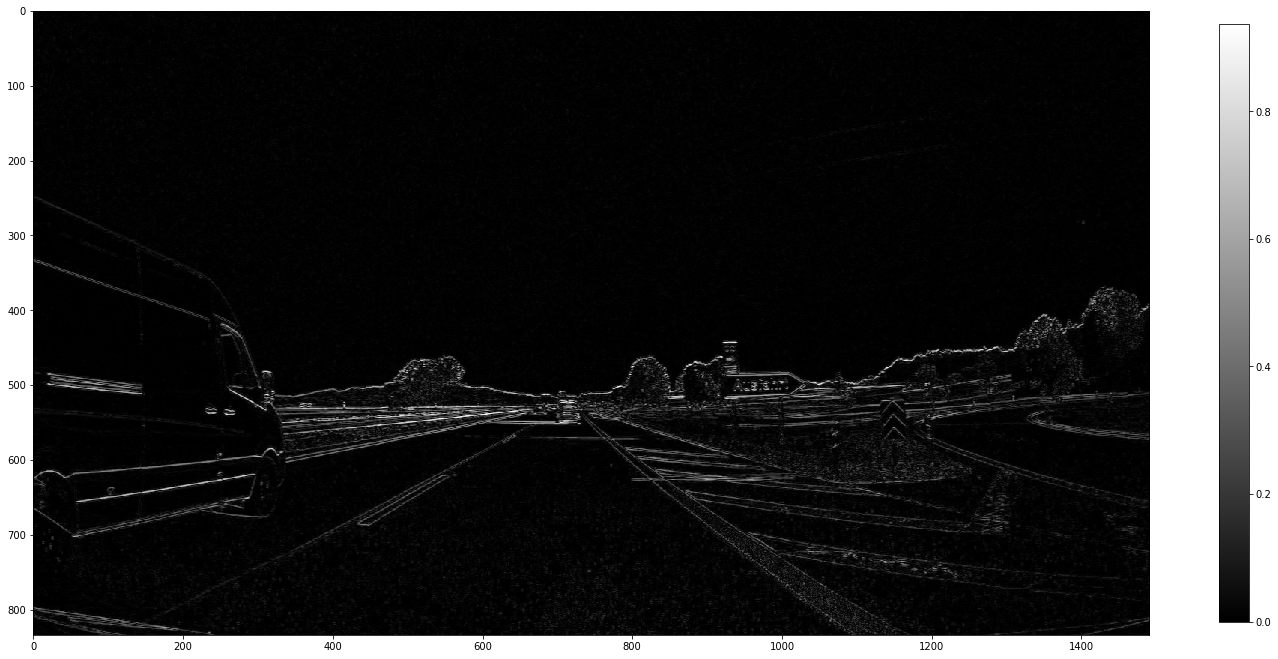

In [26]:
pixel_size_in_inch = 0.03
fig_height_inch = int(R_mag.shape[0] * pixel_size_in_inch)
fig_width_inch  = int(R_mag.shape[1] * pixel_size_in_inch)

plt.figure(figsize=(fig_height_inch,fig_width_inch))

plt.imshow(R_mag, cmap="gray")
plt.colorbar(shrink=.25)

# Show only strong filter responses

In [27]:
type(R_mag)

numpy.ndarray

In [28]:
R_mag.shape

(834, 1491)

In [29]:
THETA = 0.3
R_strong = R_mag > THETA

In [30]:
type(R_strong)

numpy.ndarray

In [31]:
R_strong.dtype

dtype('bool')

In [32]:
R_strong.shape

(834, 1491)

In [33]:
R_strong

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [34]:
R_strong2 = R_strong.astype(np.int)

In [35]:
R_strong2.dtype

dtype('int64')

In [36]:
R_strong2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

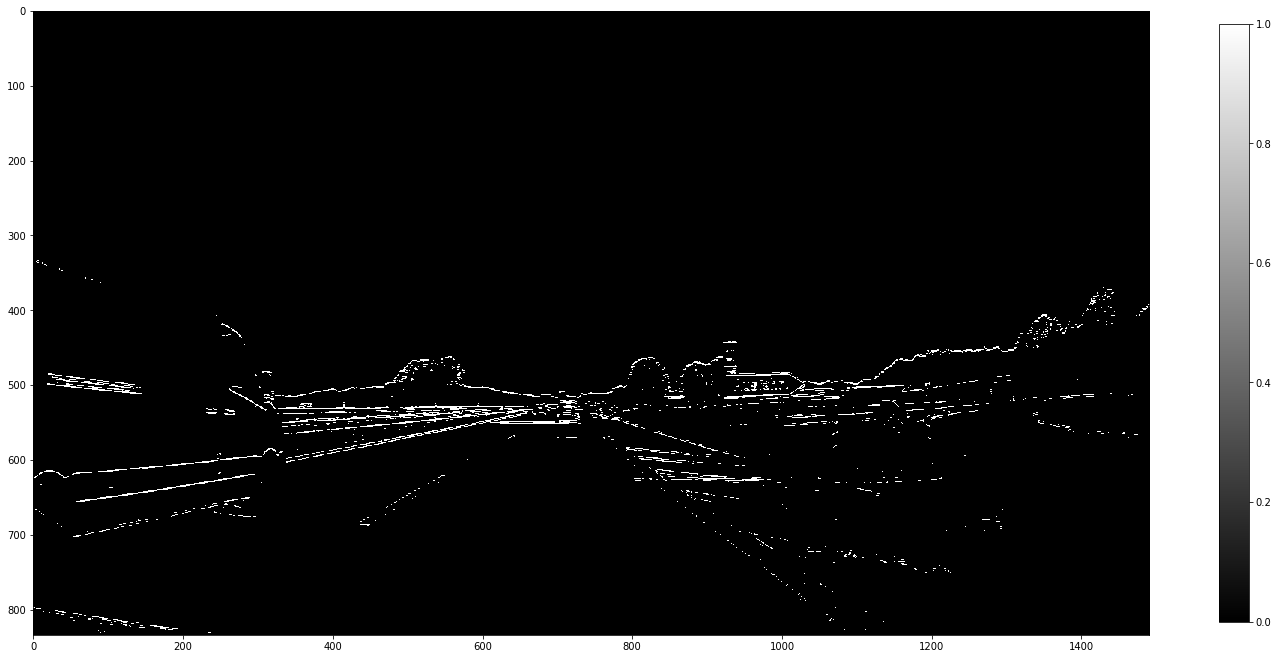

In [37]:
pixel_size_in_inch = 0.03
fig_height_inch = int(R_strong2.shape[0] * pixel_size_in_inch)
fig_width_inch  = int(R_strong2.shape[1] * pixel_size_in_inch)

plt.figure(figsize=(fig_height_inch,fig_width_inch))

plt.imshow(R_strong2, cmap="gray")
plt.colorbar(shrink=.25)

# Measuring the speed of `my_conv()`

In [38]:
import time

t1 = time.process_time()
R = my_conv(img_gray, F)
t2 = time.process_time()
elapsed_time_my_conv = t2-t1

image has shape: (836, 1493)
filter has shape: (3, 3)
response matrix has shape: (834, 1491)


In [39]:
print(type(t1))
print(t1,t2, elapsed_time_my_conv)

<class 'float'>
39.476944636 75.222067998 35.745123362


Quote for process_time() function:

>Return the value (in fractional seconds) of the sum of the system
 and user CPU time of the current process. It does not include time
 elapsed during sleep. It is process-wide by definition.    
 The reference point of the returned value is undefined, so that only
 the difference between the results of consecutive calls is valid.
    
See:
    https://docs.python.org/3/library/time.html#time.process_time

# Measuring the speed of OpenCV's `filter2D()` function for the same task

For the parameters of the `filter2D()` function see:

https://docs.opencv.org/4.2.0/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04
    
    Python:
        dst=cv.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])

In [40]:
R_opencv = cv2.filter2D(img_gray, -1, F)

In [41]:
type(R_opencv)

numpy.ndarray

In [42]:
R_opencv.shape

(836, 1493)

In [43]:
img_gray.shape

(836, 1493)

In [44]:
R.shape

(834, 1491)

In [45]:
img_gray.dtype

dtype('uint8')

In [46]:
R_opencv.min()

0

In [47]:
R_opencv.max()

255

In [48]:
R_opencv.dtype

dtype('uint8')

In [49]:
R2_opencv = cv2.filter2D(img_gray, cv2.CV_64F, F)

In [50]:
R2_opencv.dtype

dtype('float64')

In [51]:
R2_opencv.min()

-717.0

In [52]:
R2_opencv.max()

711.0

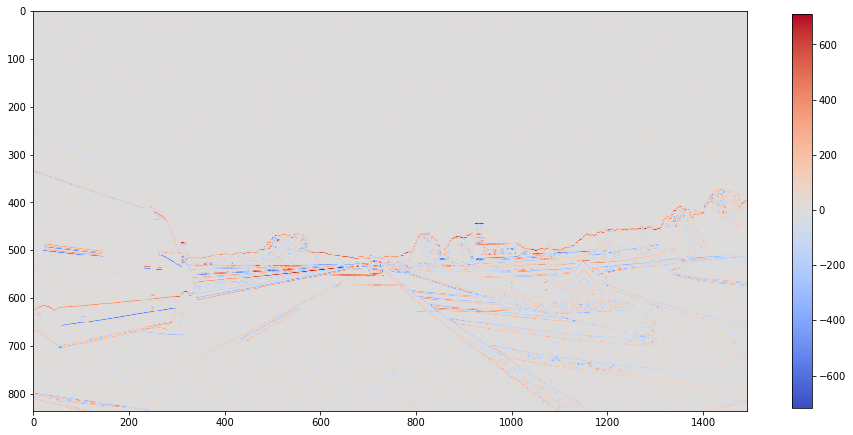

In [53]:
pixel_size_in_inch = 0.02
fig_height_inch = int(R2_opencv.shape[0] * pixel_size_in_inch)
fig_width_inch  = int(R2_opencv.shape[1] * pixel_size_in_inch)

plt.figure(figsize=(fig_height_inch,fig_width_inch))

plt.imshow(R2_opencv, cmap="coolwarm")
plt.colorbar(shrink=.25)

In [54]:
t1 = time.process_time()
R_opencv = cv2.filter2D(img_gray, -1, F)
t2 = time.process_time()
elapsed_time_opencv = t2-t1

In [55]:
print(t1,t2, elapsed_time_opencv)

75.86571745 75.871797974 0.006080523999997922


In [56]:
speedup = elapsed_time_my_conv / elapsed_time_opencv
print(speedup)

5878.625487213309
